In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download Datasets


In [4]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98%|████████████████████████████████████████▎| 146M/149M [00:01<00:00, 116MB/s]
100%|█████████████████████████████████████████| 149M/149M [00:01<00:00, 110MB/s]


## Create Annotation Dataframe

In [2]:
def get_class_paths(path):
    classes = []  # List to store class labels
    class_paths = []  # List to store paths to images
    
    # Iterate over each label in the given directory
    for label in os.listdir(path):
        label_path = os.path.join(path, label)  # Construct the full path to the label directory
        
        if os.path.isdir(label_path):  # Check if the path is a directory
            # Iterate over each image in the label directory
            for img in os.listdir(label_path):
                img_path = os.path.join(label_path, img)  # Construct the full path to the image
                
                classes.append(label)  # Append the label to the classes list
                class_paths.append(img_path)  # Append the image path to the class_paths list
    
    # Create a DataFrame with the collected class paths and labels
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })
    return df  # Return the DataFrame

In [3]:
tr_df = get_class_paths('../data/Training')
tr_df

,Class Path,Class
0,../data/Training/notumor/Tr-no_1480.jpg,notumor
1,../data/Training/notumor/Tr-no_0104.jpg,notumor
2,../data/Training/notumor/Tr-no_1342.jpg,notumor
3,../data/Training/notumor/Tr-no_1298.jpg,notumor
4,../data/Training/notumor/Tr-no_1133.jpg,notumor
...,...,...
5707,../data/Training/glioma/Tr-gl_0454.jpg,glioma
5708,../data/Training/glioma/Tr-gl_0441.jpg,glioma
5709,../data/Training/glioma/Tr-gl_1050.jpg,glioma
5710,../data/Training/glioma/Tr-gl_0307.jpg,glioma


In [4]:
ts_df = get_class_paths('../data/Testing')
ts_df

,Class Path,Class
0,../data/Testing/notumor/Te-no_0346.jpg,notumor
1,../data/Testing/notumor/Te-no_0338.jpg,notumor
2,../data/Testing/notumor/Te-no_0019.jpg,notumor
3,../data/Testing/notumor/Te-no_0096.jpg,notumor
4,../data/Testing/notumor/Te-no_0136.jpg,notumor
...,...,...
1306,../data/Testing/glioma/Te-gl_0024.jpg,glioma
1307,../data/Testing/glioma/Te-gl_0231.jpg,glioma
1308,../data/Testing/glioma/Te-gl_0220.jpg,glioma
1309,../data/Testing/glioma/Te-gl_0277.jpg,glioma


## Visualize Data Distribution

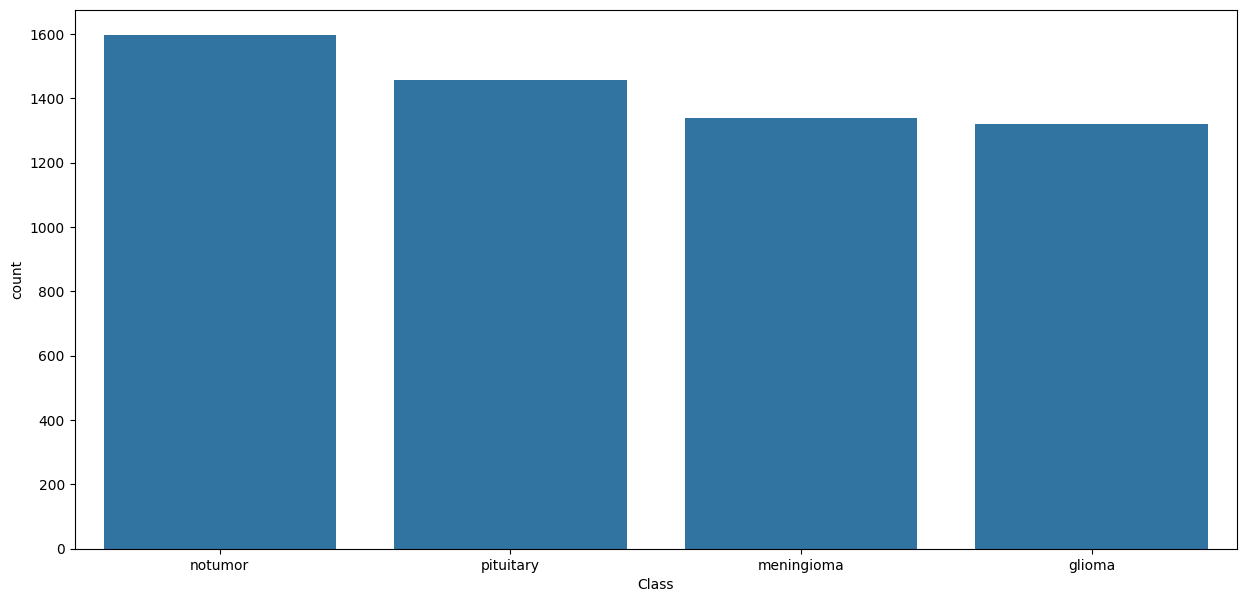

In [5]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(tr_df, x=tr_df['Class'])

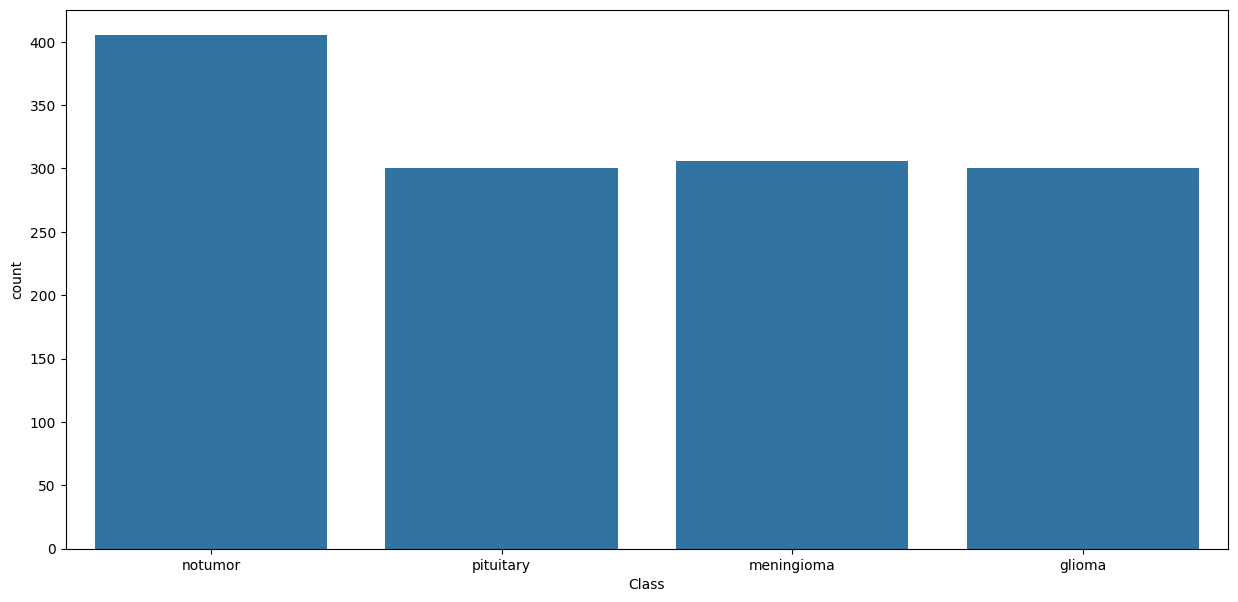

In [6]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(ts_df, x=ts_df['Class'])

## Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-11-11 19:44:16.474976: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-11 19:44:16.624206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731379456.693352     802 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731379456.714650     802 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 19:44:16.892386: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [8]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df["Class"])

In [9]:
valid_df

,Class Path,Class
717,../data/Testing/meningioma/Te-me_0147.jpg,meningioma
1023,../data/Testing/glioma/Te-gl_0069.jpg,glioma
578,../data/Testing/pituitary/Te-pi_0185.jpg,pituitary
240,../data/Testing/notumor/Te-no_0376.jpg,notumor
1163,../data/Testing/glioma/Te-gl_0153.jpg,glioma
...,...,...
1053,../data/Testing/glioma/Te-gl_0208.jpg,glioma
654,../data/Testing/pituitary/Te-pi_0207.jpg,pituitary
391,../data/Testing/notumor/Te-no_0143.jpg,notumor
288,../data/Testing/notumor/Te-noTr_0007.jpg,notumor


In [10]:
ts_df

,Class Path,Class
352,../data/Testing/notumor/Te-no_0313.jpg,notumor
784,../data/Testing/meningioma/Te-me_0013.jpg,meningioma
885,../data/Testing/meningioma/Te-me_0284.jpg,meningioma
537,../data/Testing/pituitary/Te-pi_0110.jpg,pituitary
662,../data/Testing/pituitary/Te-pi_0288.jpg,pituitary
...,...,...
723,../data/Testing/meningioma/Te-me_0223.jpg,meningioma
947,../data/Testing/meningioma/Te-me_0164.jpg,meningioma
184,../data/Testing/notumor/Te-no_0312.jpg,notumor
1020,../data/Testing/glioma/Te-gl_0204.jpg,glioma


## Building Model

In [11]:
BATCH_SIZE = 16
IMG_SIZE = (299, 299)
img_gen = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

In [12]:
tr_gen = img_gen.flow_from_dataframe(tr_df, x_col="Class Path",
                                     y_col="Class",
                                     batch_size=BATCH_SIZE,
                                     target_size=IMG_SIZE)

valid_gen = img_gen.flow_from_dataframe(valid_df, x_col="Class Path",
                                        y_col="Class",
                                        batch_size=BATCH_SIZE,
                                        target_size=IMG_SIZE)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path",
                                     y_col="Class",
                                     batch_size=16,
                                     target_size=IMG_SIZE, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


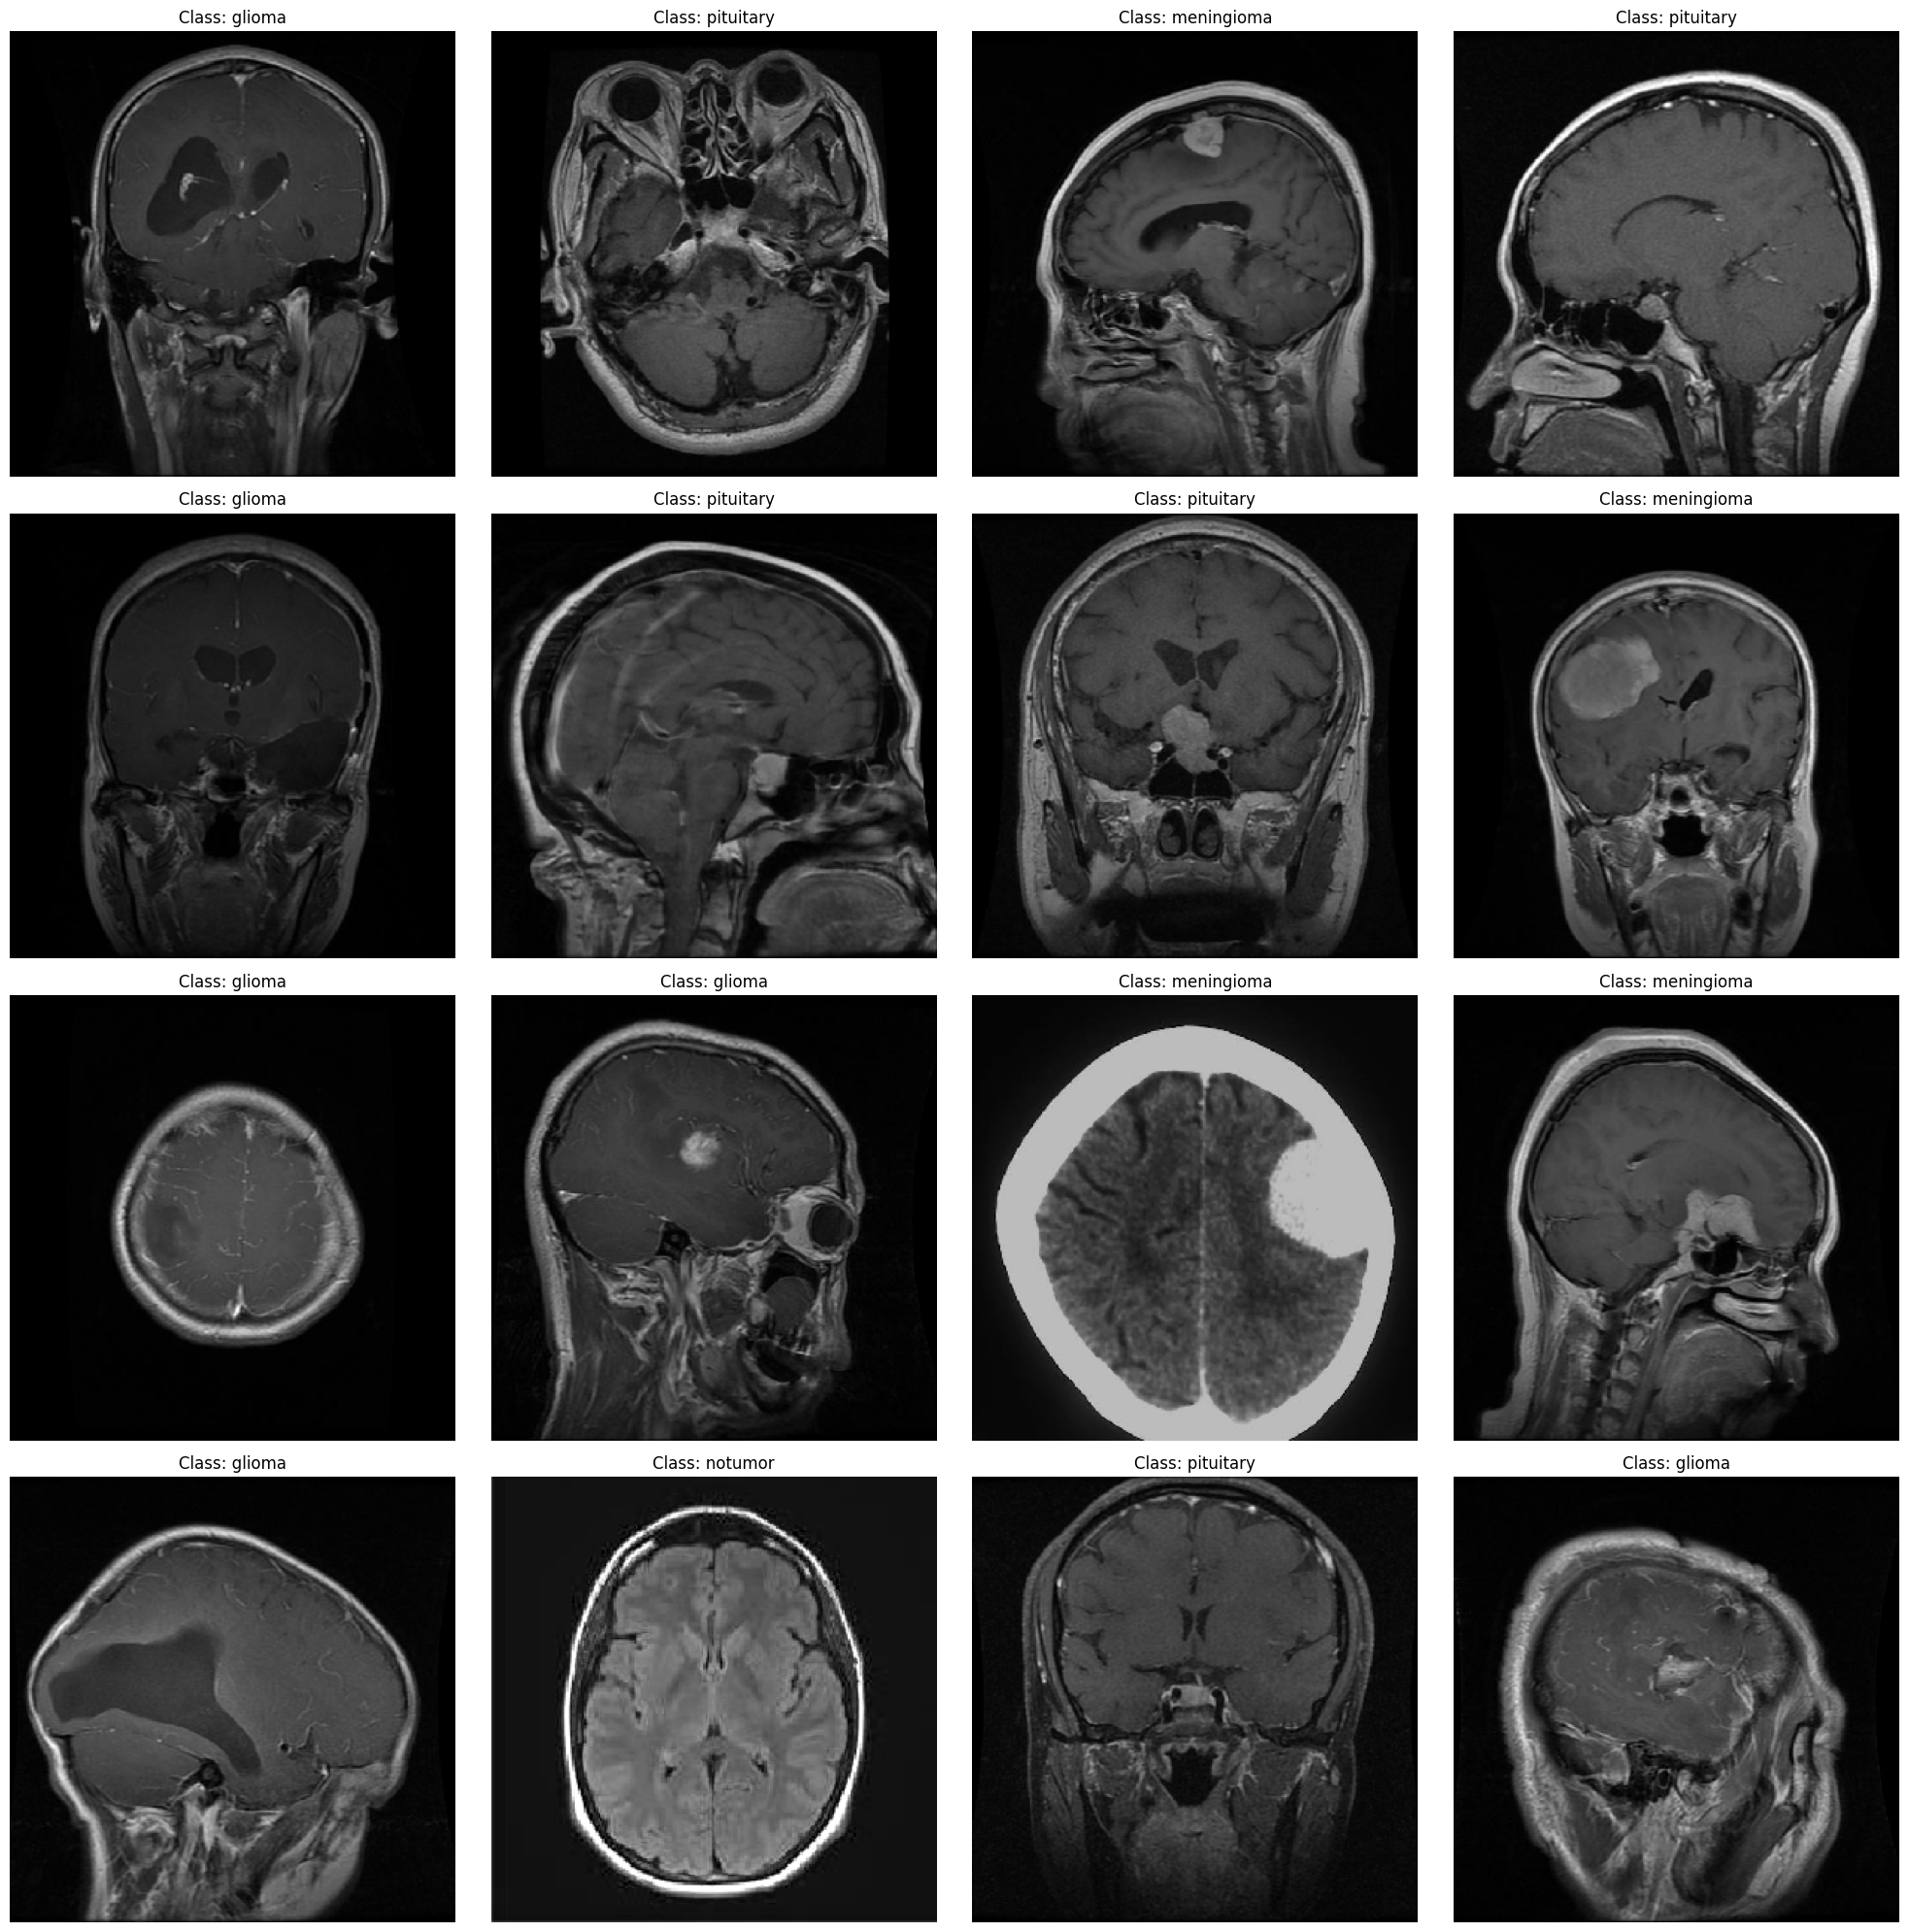

In [13]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)
    
    class_index = np.argmax(label)
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())
    
    index_position = class_indices.index(class_index)
    class_name = class_names[index_position]
    
    plt.title(f"Class: {class_name}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [14]:
# Define the shape of the input images
img_shape = (299,299, 3)

# Load the Xception model pre-trained on ImageNet, excluding the top layer
base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling='max')

# Create a Sequential model
model = Sequential([
    base_model,  # Add the base model
    Flatten(),  # Flatten the output of the base model
    Dropout(rate=0.3),  # Add a dropout layer with a rate of 0.3
    Dense(128, activation='relu'),  # Add a dense layer with 128 units and ReLU activation
    Dropout(rate=0.25),  # Add another dropout layer with a rate of 0.25
    Dense(4, activation='softmax')  # Add a dense layer with 4 units and softmax activation for classification
])

I0000 00:00:1731379479.519311     802 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9517 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:02:00.0, compute capability: 8.9


In [15]:
# Compile the model with Adamax optimizer, categorical crossentropy loss, and accuracy, precision, and recall metrics
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

## Training Model

In [16]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/home/luisruiz720/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731379493.737471    1065 service.cc:148] XLA service 0x7f96e0003f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731379493.737872    1065 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2024-11-11 19:44:54.226783: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731379495.418953    1065 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1731379499.740650 

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7854 - loss: 0.5857 - precision: 0.8536 - recall: 0.7025

E0000 00:00:1731379556.022168    1066 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1731379556.150940    1066 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2024-11-11 19:45:57.090582: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.00GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-11 19:45:57.500358: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if m

357/357 ━━━━━━━━━━━━━━━━━━━━ 74s 124ms/step - accuracy: 0.7857 - loss: 0.5849 - precision: 0.8538 - recall: 0.7029 - val_accuracy: 0.8733 - val_loss: 0.6035 - val_precision: 0.8756 - val_recall: 0.8702
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.9712 - loss: 0.0906 - precision: 0.9733 - recall: 0.9683 - val_accuracy: 0.9710 - val_loss: 0.0957 - val_precision: 0.9769 - val_recall: 0.9664
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.9884 - loss: 0.0337 - precision: 0.9884 - recall: 0.9880 - val_accuracy: 0.9802 - val_loss: 0.0655 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.9914 - loss: 0.0307 - precision: 0.9917 - recall: 0.9914 - val_accuracy: 0.9863 - val_loss: 0.1241 - val_precision: 0.9878 - val_recall: 0.9863
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.9935 - loss: 0.0224 - precision: 0.9944 - recall: 0.9935 - val_accuracy: 0.9817 - val_loss: 0.

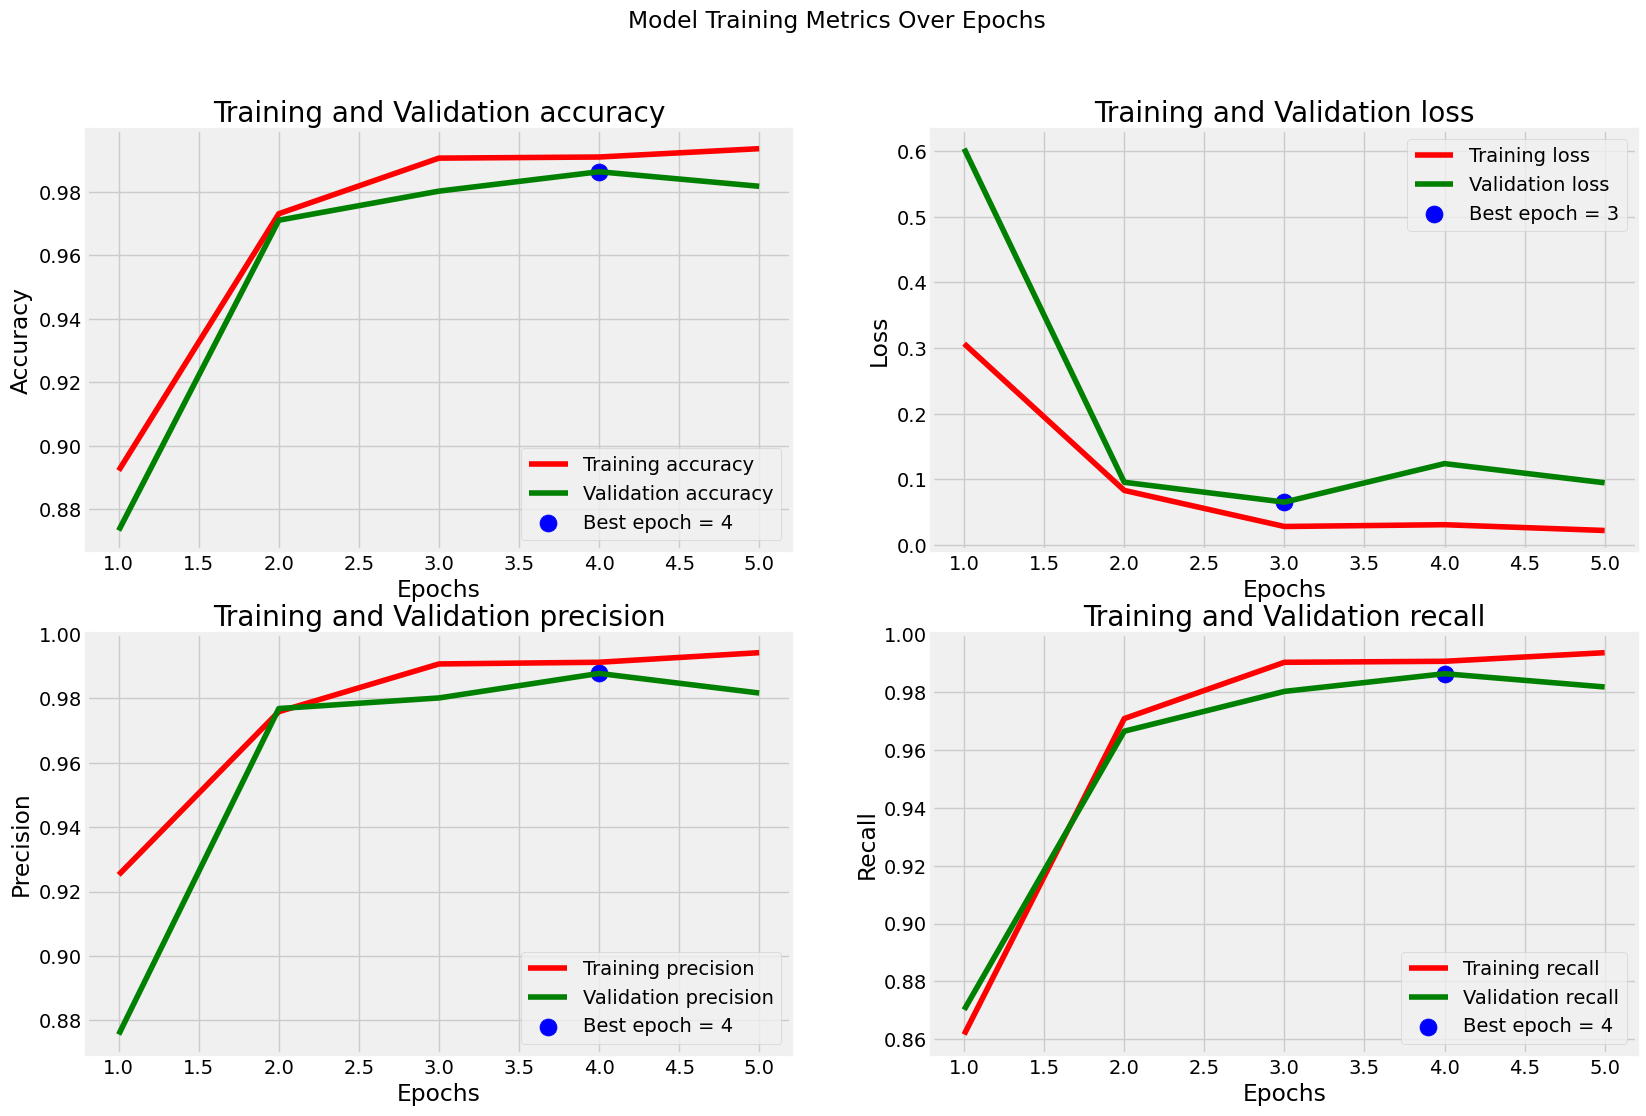

In [17]:
# Define the metrics to be tracked
metrics = ["accuracy", "loss", "precision", "recall"]


def plot_training_metrics(hist, metrics):
    # Extract training metrics from the history object
    tr_metrics = {m: hist.history[m] for m in metrics}

    # Extract validation metrics from the history object
    val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

    # Initialize dictionaries to store the best epochs and their corresponding values
    best_epochs = {}
    best_values = {}

    # Iterate over each metric to find the best epoch and its value
    for m in metrics:
        if m == 'loss':
            # For loss, the best epoch is the one with the minimum value
            idx = np.argmin(val_metrics[m])
        else:
            # For other metrics, the best epoch is the one with the maximum value
            idx = np.argmax(val_metrics[m])
        best_epochs[m] = idx + 1  # Store the best epoch (1-based index)
        best_values[m] = val_metrics[m][idx]  # Store the best value

    # Create a figure for plotting
    plt.figure(figsize=(20,12))

    # Set the style for the plots
    plt.style.use('fivethirtyeight')

    # Iterate over each metric to create subplots
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)  # Create a subplot
        epochs = range(1, len(tr_metrics[metric]) + 1)  # Define the range of epochs

        # Plot training metrics
        plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')

        # Plot validation metrics
        plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')

        # Highlight the best epoch with a scatter plot
        plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                    label=f"Best epoch = {best_epochs[metric]}")

        # Set the title and labels for the subplot
        plt.title(f'Training and Validation {metric}')
        plt.xlabel("Epochs")
        plt.ylabel(metric.title())
        plt.legend()  # Add a legend
        plt.grid(True)  # Enable grid

    # Set the main title for the figure
    plt.suptitle("Model Training Metrics Over Epochs")

    # Display the plots
    plt.show()

# Call the function to plot the metrics
plot_training_metrics(hist, metrics)

In [18]:
hist2 = model.fit(tr_gen, epochs=6, validation_data=valid_gen)

Epoch 1/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.9927 - loss: 0.0271 - precision: 0.9927 - recall: 0.9923 - val_accuracy: 0.9893 - val_loss: 0.0488 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 2/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.9951 - loss: 0.0222 - precision: 0.9951 - recall: 0.9951 - val_accuracy: 0.9939 - val_loss: 0.0553 - val_precision: 0.9939 - val_recall: 0.9939
Epoch 3/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step - accuracy: 0.9983 - loss: 0.0063 - precision: 0.9983 - recall: 0.9983 - val_accuracy: 0.9863 - val_loss: 0.0788 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 4/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.9975 - loss: 0.0091 - precision: 0.9975 - recall: 0.9975 - val_accuracy: 0.9908 - val_loss: 0.0318 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 5/6
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 102ms/step - accuracy: 0.9982 - loss: 0.0055 - precision: 0.9982 - recall: 0.9982 - val_accuracy: 0.9756 - va

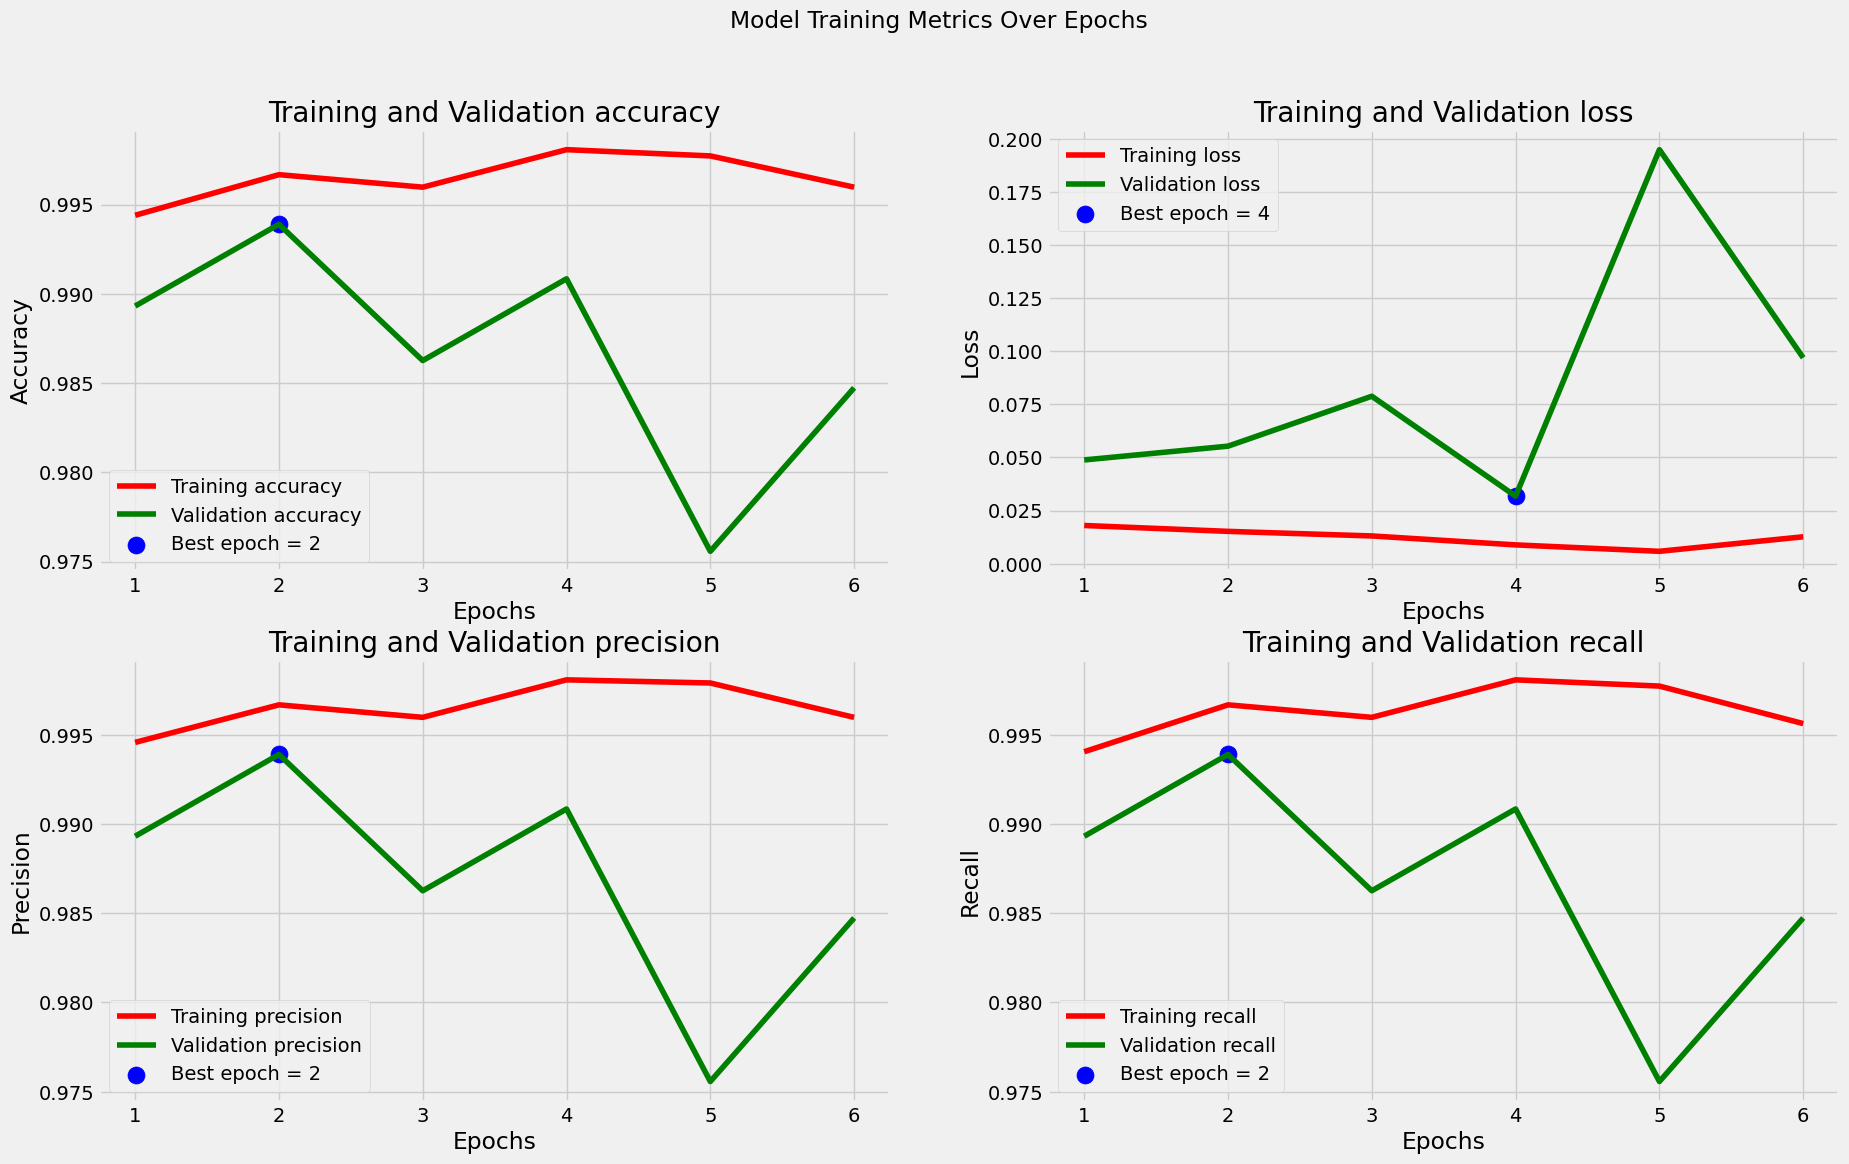

In [19]:
plot_training_metrics(hist2, metrics)

## Evaluation

In [20]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]*100:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}%")

357/357 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9949 - loss: 0.0173 - precision: 0.9949 - recall: 0.9945
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9899 - loss: 0.0441 - precision: 0.9899 - recall: 0.9899


/home/luisruiz720/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9889 - loss: 0.0742 - precision: 0.9889 - recall: 0.9889
Train Accuracy: 99.46%
Train Loss: 1.9676%


Validation Accuracy: 98.47%
Validation Loss: 0.1210%


Test Accuracy: 98.17%
Test Loss: 0.1348%


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


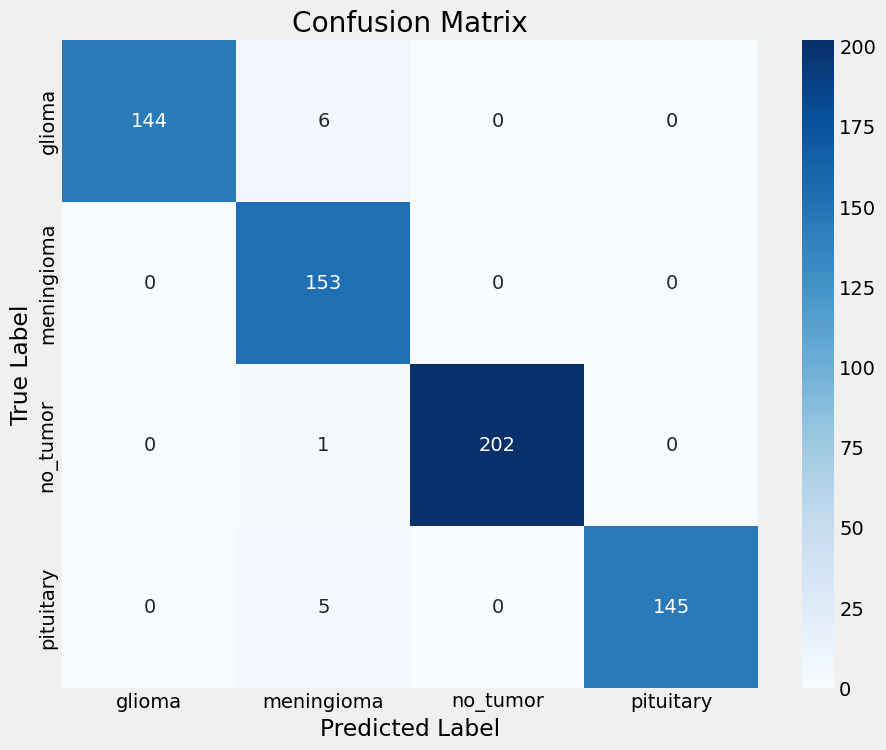

In [21]:
def plot_confusion_matrix(model):
    preds = model.predict(ts_gen)
    y_pred = np.argmax(preds, axis=1)

    class_dict = {
        0: "glioma",
        1: "meningioma",
        2: "no_tumor",
        3: "pituitary"
    }

    cm = confusion_matrix(ts_gen.classes, y_pred)
    labels = list(class_dict.values())
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Call the function
plot_confusion_matrix(model)

In [26]:
from PIL import Image
class_dict = {
        0: "glioma",
        1: "meningioma",
        2: "no_tumor",
        3: "pituitary"
    }


def predict(img_path: str) -> None:
    labels = list(class_dict.values())
    plt.figure(figsize=(6,8))
    
    img = Image.open(img_path)
    resized_img = img.resize((299,299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0)/255.0
    
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])
    
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]
    
    plt.subplot(2,1,1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")
    
    plt.subplot(2,1,2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")
    
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


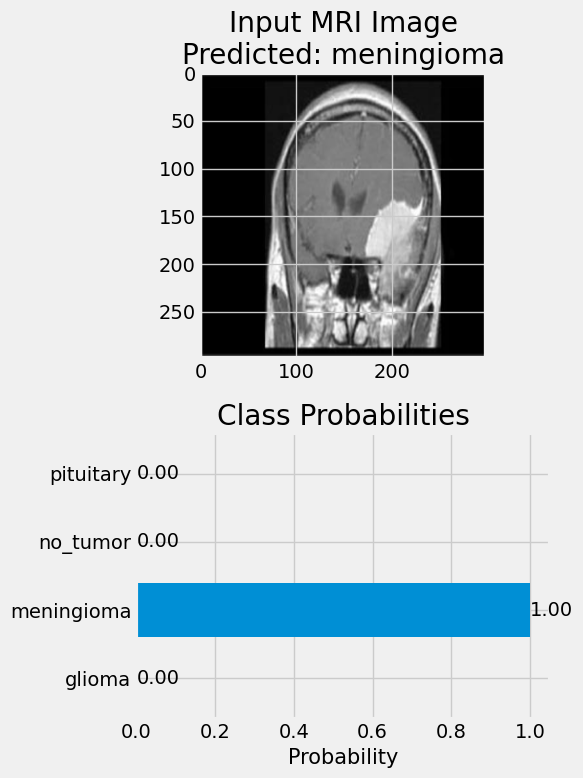


Predicted tumor type: meningioma


In [27]:
predict("../data/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


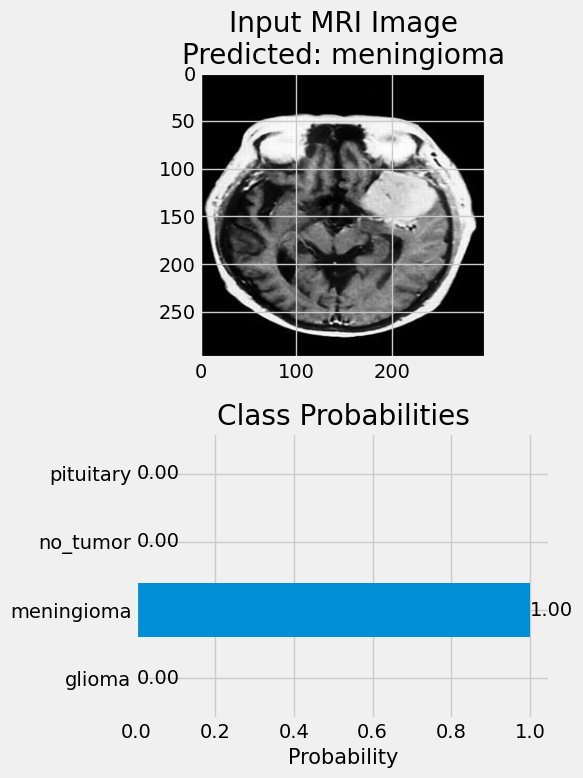


Predicted tumor type: meningioma


In [28]:
predict("../data/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


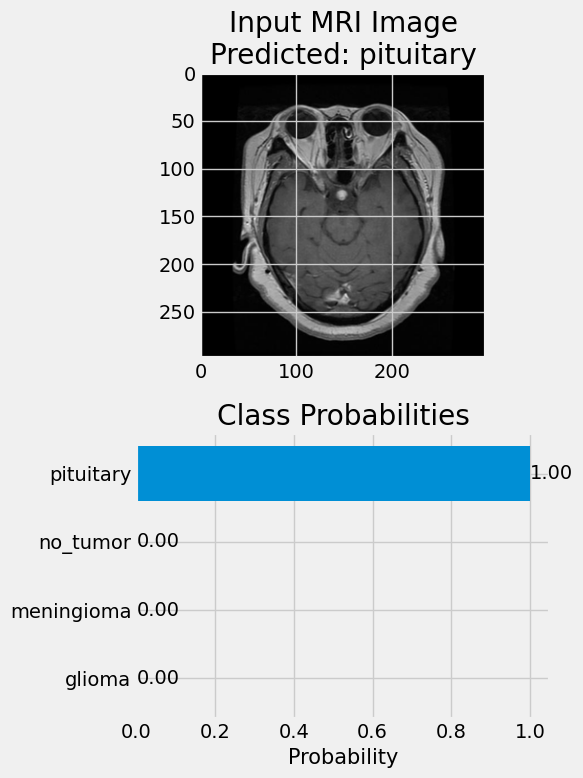


Predicted tumor type: pituitary


In [29]:
predict("../data/Testing/pituitary/Te-pi_0010.jpg")

## Save Model

In [ ]:
model.save_weights("../model/xception_model.weights.h5")

# CNN

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [31]:
BATCH_SIZE = 16
IMG_SIZE = (224, 224)

img_gen = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = img_gen.flow_from_dataframe(tr_df, x_col="Class Path",
                                     y_col="Class",
                                     batch_size=BATCH_SIZE,
                                     target_size=IMG_SIZE)

valid_gen = img_gen.flow_from_dataframe(valid_df, x_col="Class Path",
                                        y_col="Class",
                                        batch_size=BATCH_SIZE,
                                        target_size=IMG_SIZE)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col="Class Path",
                                     y_col="Class",
                                     batch_size=16,
                                     target_size=IMG_SIZE, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [32]:
cnn_model = Sequential()
"""
This script defines and compiles a Convolutional Neural Network (CNN) model using the Keras Sequential API for brain tumor MRI classification.

The model architecture includes:
- A Conv2D layer with 512 filters, 3x3 kernel size, same padding, and ReLU activation to extract features from the input image.
- A MaxPooling2D layer with 2x2 pool size to reduce spatial dimensions by taking the maximum value in each 2x2 block.
- A Conv2D layer with 256 filters, 3x3 kernel size, same padding, and ReLU activation to extract more complex features.
- A MaxPooling2D layer with 2x2 pool size to further reduce spatial dimensions.
- A Dropout layer with a rate of 0.25 to prevent overfitting by randomly setting 25% of the input units to 0 during training.
- A Conv2D layer with 128 filters, 3x3 kernel size, same padding, and ReLU activation to extract even more complex features.
- A MaxPooling2D layer with 2x2 pool size to further reduce spatial dimensions.
- A Dropout layer with a rate of 0.25 to prevent overfitting by randomly setting 25% of the input units to 0 during training.
- A Conv2D layer with 64 filters, 3x3 kernel size, same padding, and ReLU activation to extract even more complex features.
- A MaxPooling2D layer with 2x2 pool size to further reduce spatial dimensions.
- A Flatten layer to convert the 2D matrix output from the previous layer into a 1D vector.
- A Dense layer with 256 units, ReLU activation, and L2 regularization to learn complex patterns and prevent overfitting.
- A Dropout layer with a rate of 0.35 to prevent overfitting by randomly setting 35% of the input units to 0 during training.
- A Dense output layer with 4 neurons and softmax activation for multi-class classification.

The model is compiled with:
- Adamax optimizer with a learning rate of 0.001.
- Categorical crossentropy loss function for multi-class classification.
- Accuracy, Precision, and Recall metrics to evaluate the model's performance.

Finally, the model summary is printed to provide an overview of the model architecture.
"""

# Add a convolutional layer with 512 filters, 3x3 kernel size, same padding, ReLU activation
# This layer extracts features from the input image using 512 filters of size 3x3.
cnn_model.add(Conv2D(512, (3,3), padding="same", input_shape=(224,224,3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
# This layer reduces the spatial dimensions (height and width) by taking the maximum value in each 2x2 block.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Add a convolutional layer with 256 filters, 3x3 kernel size, same padding, ReLU activation
# This layer extracts more complex features using 256 filters of size 3x3.
cnn_model.add(Conv2D(256, (3,3), padding="same", activation="relu"))

# Add a max pooling layer with 2x2 pool size
# This layer further reduces the spatial dimensions by taking the maximum value in each 2x2 block.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Add a dropout layer with a rate of 0.25
# This layer helps prevent overfitting by randomly setting 25% of the input units to 0 during training.
cnn_model.add(Dropout(0.25))

# Add a convolutional layer with 128 filters, 3x3 kernel size, same padding, ReLU activation
# This layer extracts even more complex features using 128 filters of size 3x3.
cnn_model.add(Conv2D(128, (3,3), padding="same", activation="relu"))

# Add a max pooling layer with 2x2 pool size
# This layer further reduces the spatial dimensions by taking the maximum value in each 2x2 block.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Add a dropout layer with a rate of 0.25
# This layer helps prevent overfitting by randomly setting 25% of the input units to 0 during training.
cnn_model.add(Dropout(0.25))

# Add a convolutional layer with 64 filters, 3x3 kernel size, same padding, ReLU activation
# This layer extracts even more complex features using 64 filters of size 3x3.
cnn_model.add(Conv2D(64, (3,3), padding="same", activation='relu'))

# Add a max pooling layer with 2x2 pool size
# This layer further reduces the spatial dimensions by taking the maximum value in each 2x2 block.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output of the previous layer
# This layer converts the 2D matrix output from the previous layer into a 1D vector.
cnn_model.add(Flatten())

# Add a dense layer with 256 units, ReLU activation, and L2 regularization
# This fully connected layer with 256 units helps in learning complex patterns. L2 regularization helps prevent overfitting.
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add a dropout layer with a rate of 0.35
# This layer helps prevent overfitting by randomly setting 35% of the input units to 0 during training.
cnn_model.add(Dropout(0.35))

# Ouput layer with 4 neurons for the 4 classes
cnn_model.add(Dense(4, activation='softmax'))

# Compile the model with Adamax optimizer, categorical crossentropy loss, and accuracy, precision, and recall metrics
# This step configures the model for training.
cnn_model.compile(optimizer=Adamax(learning_rate=0.001),
                  loss="categorical_crossentropy",
                  metrics=[
                      "accuracy",
                      Precision(name='precision'),
                      Recall(name='recall')
                  ])

# Print the model summary
# This step prints a summary of the model architecture.
cnn_model.summary()

/home/luisruiz720/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 512)  │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 256)  │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

history = cnn_model.fit(tr_gen, epochs=20, validation_data=valid_gen, callbacks=[callback])

Epoch 1/20


/home/luisruiz720/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-11-11 19:56:37.685445: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-11 19:56:42.457243: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 16.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if

354/357 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6065 - loss: 2.2270 - precision: 0.7186 - recall: 0.4450

2024-11-11 19:57:25.203028: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.22GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


357/357 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.6073 - loss: 2.2254 - precision: 0.7187 - recall: 0.4453 - val_accuracy: 0.7679 - val_loss: 0.8822 - val_precision: 0.8225 - val_recall: 0.6931
Epoch 2/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.8140 - loss: 0.7143 - precision: 0.8352 - recall: 0.7855 - val_accuracy: 0.8260 - val_loss: 0.5938 - val_precision: 0.8511 - val_recall: 0.8031
Epoch 3/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.8698 - loss: 0.5263 - precision: 0.8799 - recall: 0.8511 - val_accuracy: 0.8794 - val_loss: 0.5101 - val_precision: 0.8994 - val_recall: 0.8595
Epoch 4/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.8937 - loss: 0.4397 - precision: 0.9007 - recall: 0.8867 - val_accuracy: 0.8244 - val_loss: 0.5813 - val_precision: 0.8378 - val_recall: 0.8122
Epoch 5/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.9154 - loss: 0.3799 - precision: 0.9210 - recall: 0.9078 - val_accuracy: 0.9206 - val_loss

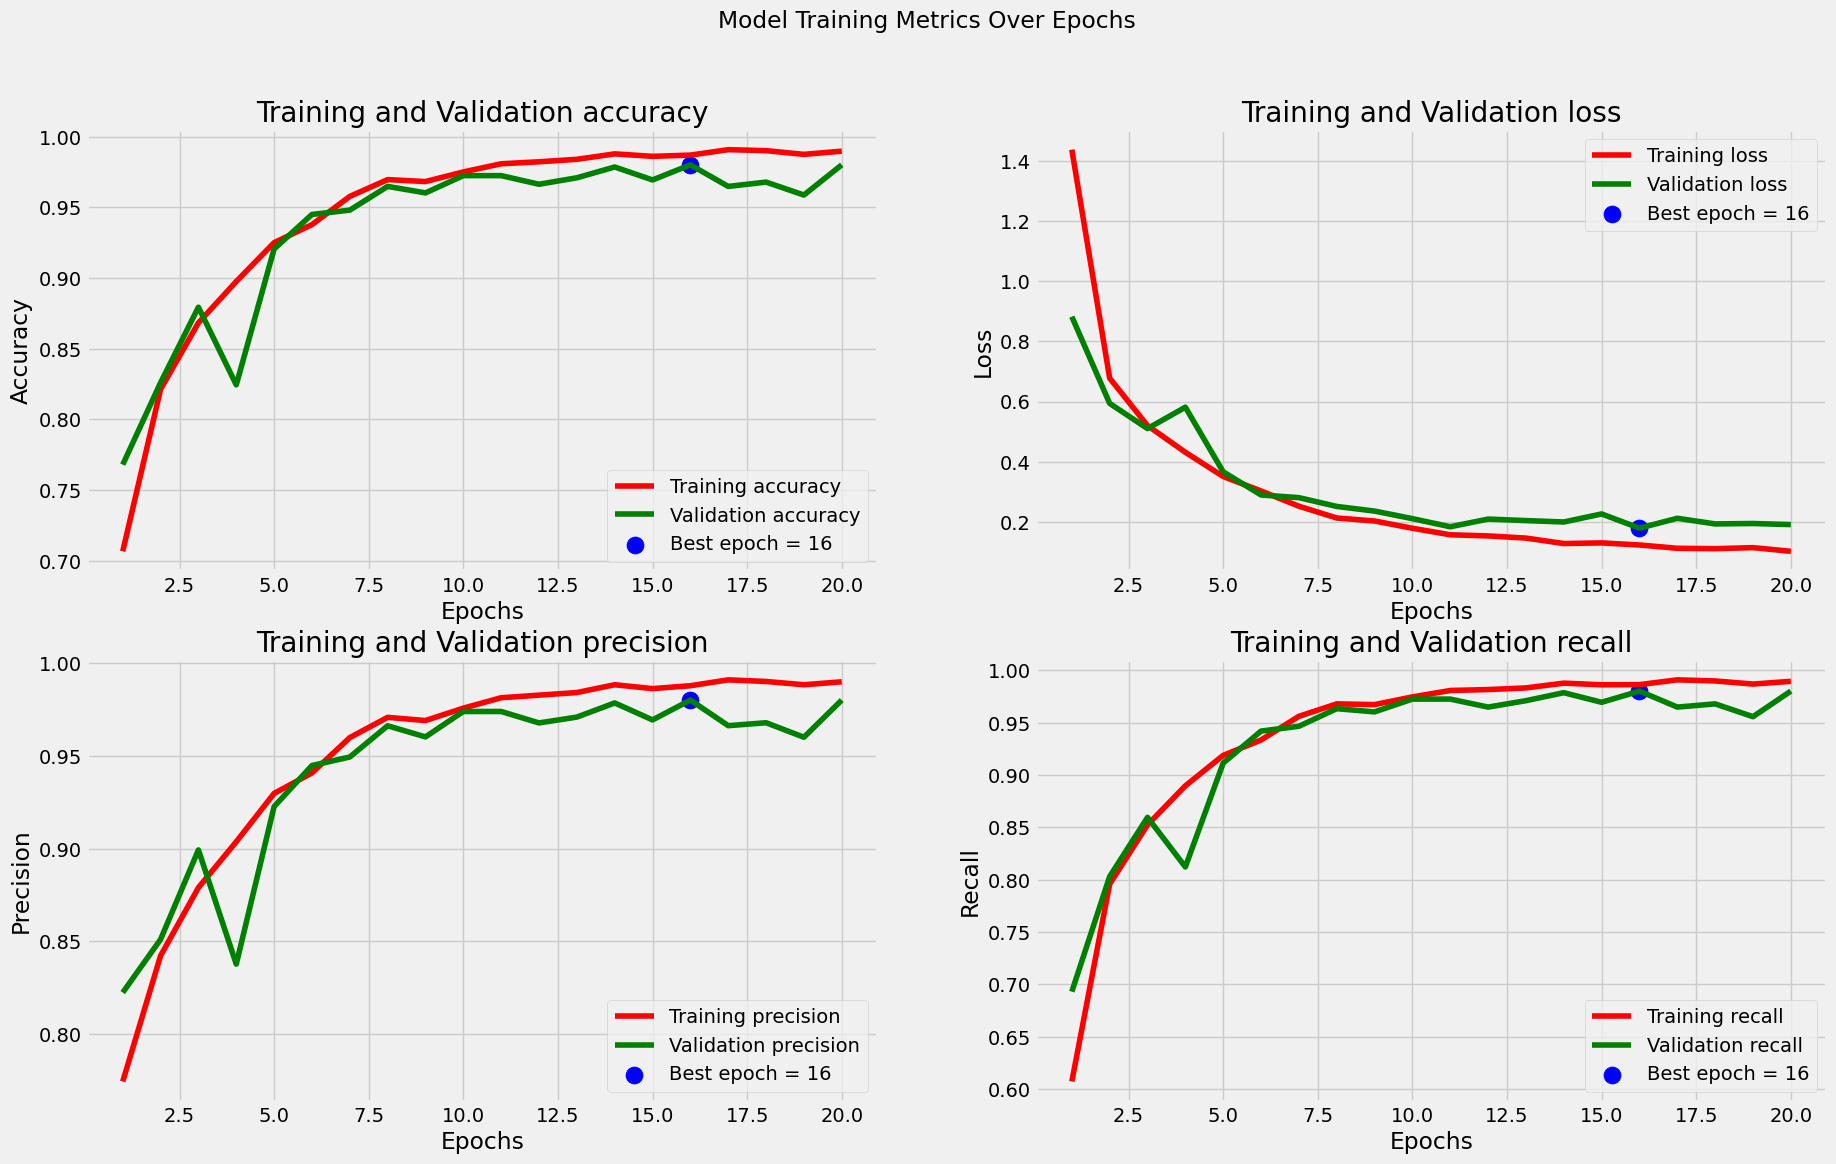

In [40]:
plot_training_metrics(history, metrics)

In [41]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]*100:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}%")

357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9974 - loss: 0.0862 - precision: 0.9979 - recall: 0.9974
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9820 - loss: 0.1560 - precision: 0.9820 - recall: 0.9820
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9616 - loss: 0.2064 - precision: 0.9616 - recall: 0.9616
Train Accuracy: 99.75%
Train Loss: 8.5677%


Validation Accuracy: 97.86%
Validation Loss: 0.1911%


Test Accuracy: 97.41%
Test Loss: 0.1758%


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


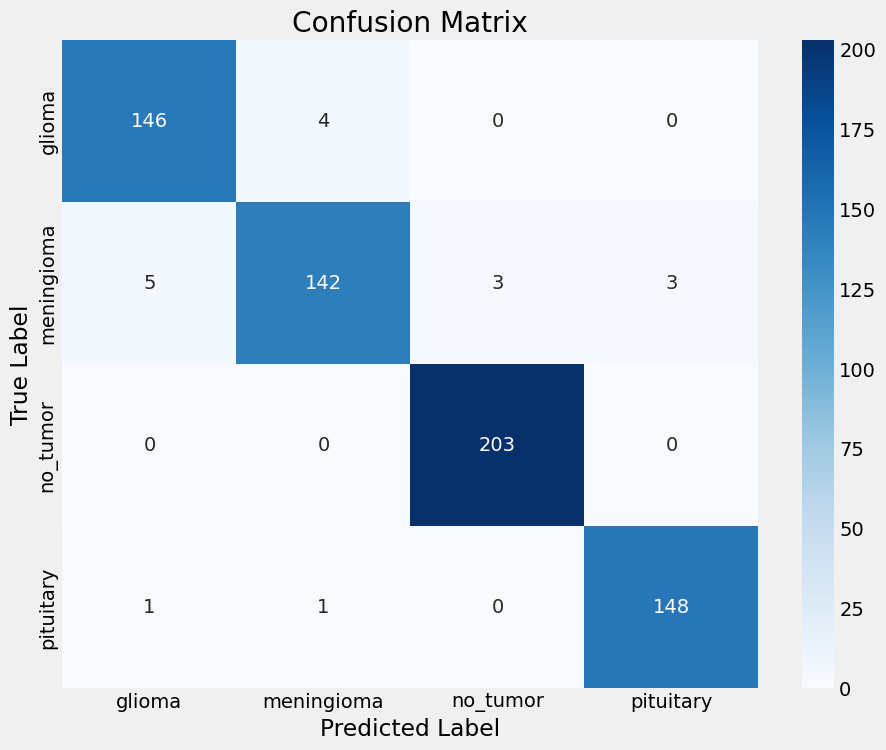

In [42]:
plot_confusion_matrix(cnn_model)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


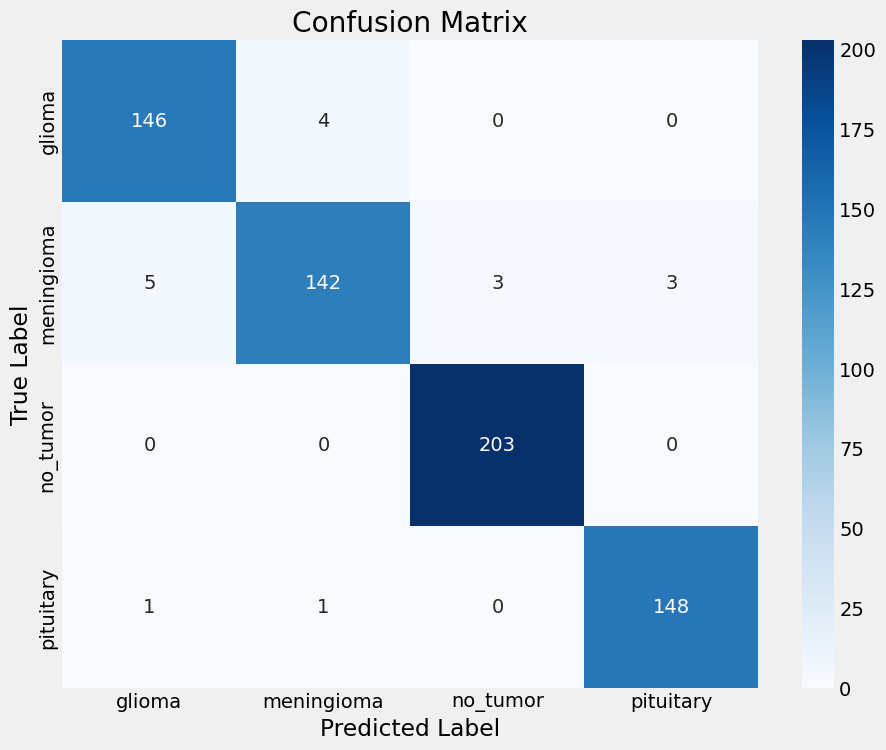

In [44]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.values())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [45]:

clr=classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       150
           1       0.97      0.93      0.95       153
           2       0.99      1.00      0.99       203
           3       0.98      0.99      0.98       150

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



In [47]:
cnn_model.save_weights("../weights/custom_model.weights.h5")

In [2]:
from threading import Thread
from pyngrok import ngrok
import os
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
API_KEY = os.getenv("NGROK_AUTH_TOKEN")
ngrok.set_auth_token(API_KEY)

In [ ]:
def run_streamlit():
    os.system("streamlit run ../notebooks/app.py --server.port 8501")

In [11]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
import PIL.Image
import os


def load_xception_model(model_path):
    # Define the shape of the input images
    img_shape = (299,299, 3)

    # Load the Xception model pre-trained on ImageNet, excluding the top layer
    base_model = tf.keras.applications.Xception(include_top=False,
                                                weights="imagenet",
                                                input_shape=img_shape,
                                                pooling='max')

    # Create a Sequential model
    model = Sequential([
        base_model,  # Add the base model
        Flatten(),  # Flatten the output of the base model
        Dropout(rate=0.3),  # Add a dropout layer with a rate of 0.3
        Dense(128, activation='relu'),  # Add a dense layer with 128 units and ReLU activation
        Dropout(rate=0.25),  # Add another dropout layer with a rate of 0.25
        Dense(4, activation='softmax')  # Add a dense layer with 4 units and softmax activation for classification
    ])
    model.compile(Adamax(learning_rate=0.001), loss="categorical_crossentropy",
                  metrics=["accuracy", Precision(), Recall()])
    model.load_weights(model_path)
    
    return model

st.title("Brain Tumor Classification")
st.write("Upload an image of a brian MRI scan to classify")
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])
if uploaded_file:
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )
    
    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model("../weights/xception_model.weights.h5")
        img_size = (299, 299)
    else:
        model = load_model("../weights/custom_model.weights.h5")
        img_size = (224, 224)

Overwriting app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()


      👋 Welcome to Streamlit!

      If you’d like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email:  

In [ ]:
public_url = ngrok.connect(addr='8501', proto="http", bind_tls=True)
print("Public URL", public_url)

Public URL NgrokTunnel: "https://7857-73-243-165-204.ngrok-free.app" -> "http://localhost:8080"
